<a href="https://colab.research.google.com/github/holdenkim/BBGS_2nd/blob/main/BBGS_2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#단변량데이터탐색

In [48]:
import pandas as pd
data = pd.read_csv('Ex_CEOSalary.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [50]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [51]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [52]:
Ind_repl = {"industry":{1:"Service", 2:"Finance", 3:"IT", 4:"Others"}}

In [53]:
data_ind = data.replace(Ind_repl)

In [54]:
data_ind.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,Service
1,1001,9958.000000,10.9,Service
2,1122,6125.899902,23.5,Service
3,578,16246.000000,5.9,Service
4,1368,21783.199219,13.8,Service


In [55]:
data["industry"] = data["industry"].replace([1,2,3,4],["Service","Finance", "IT", "Others"])

In [56]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,Service
1,1001,9958.000000,10.9,Service
2,1122,6125.899902,23.5,Service
3,578,16246.000000,5.9,Service
4,1368,21783.199219,13.8,Service


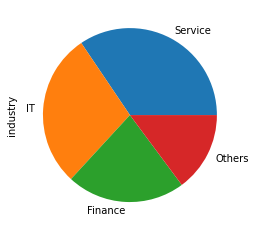

In [57]:
%matplotlib inline
data['industry'].value_counts().plot(kind='pie')

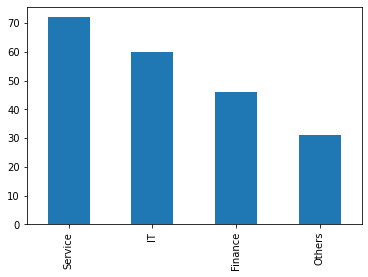

In [58]:
%matplotlib inline
data['industry'].value_counts().plot(kind='bar')

In [59]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [60]:
#중위수와 평균값 차이 확인 하여 이상치 여부 확인

In [61]:
type(data.describe())

pandas.core.frame.DataFrame

In [62]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [63]:
for i in data.describe().columns:
  x= (data.describe().at['mean',i] - data.describe().at['50%',i])/data.describe().at['mean',i]
  print(i, x)

salary 0.18899064066269783
sales 0.46485982465244685
roe 0.09800918725366825


In [64]:
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [65]:
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041bb63c90>,
      dtype=object)

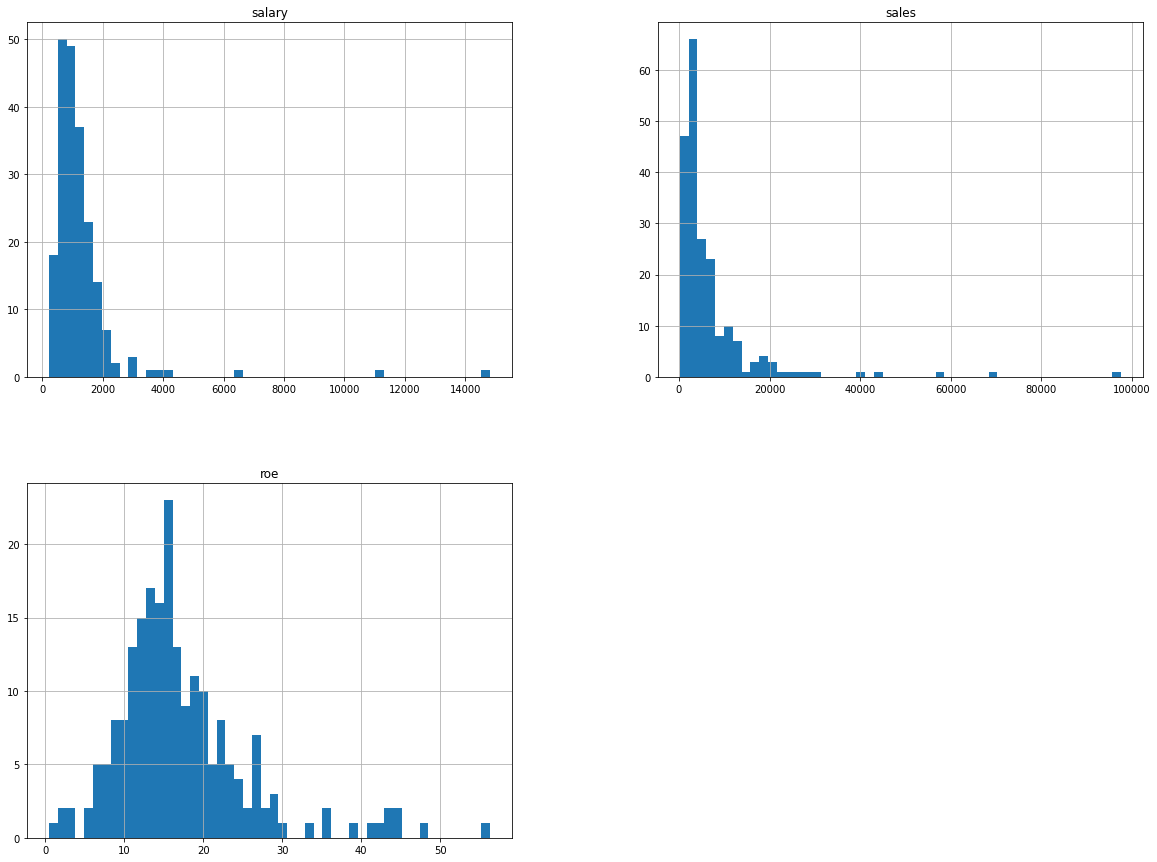

In [66]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

#이변량데이터탐색

In [67]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [68]:
data.corr('pearson')

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [69]:
data.corr('spearman')

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [70]:
data.corr('kendall')

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


In [71]:
import matplotlib.pyplot as plt

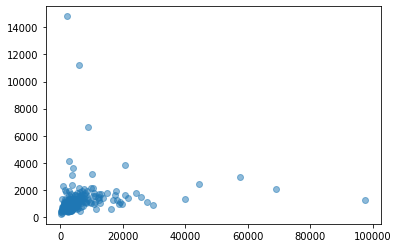

In [72]:
plt.scatter(data['sales'], data['salary'],alpha=0.5)

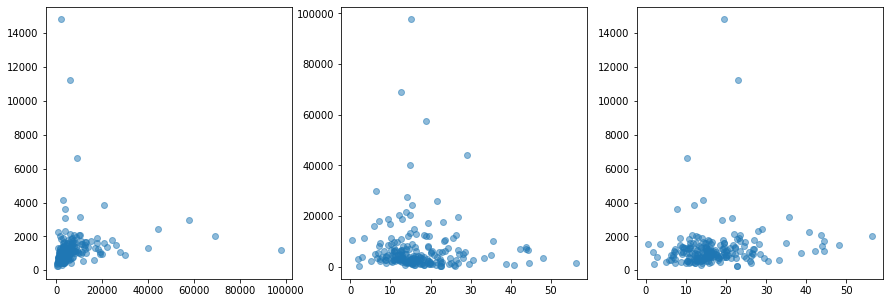

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].scatter(data['sales'], data['salary'],alpha=0.5)
axes[1].scatter(data['roe'], data['sales'],alpha=0.5)
axes[2].scatter(data['roe'], data['salary'],alpha=0.5)

In [74]:
data.groupby('industry')[['salary']].describe()

salary                            ...                          
          count         mean          std  ...     50%      75%      max
industry                                   ...                          
Finance    46.0  1344.913043  1002.813128  ...  1119.5  1406.00   6640.0
IT         60.0  1722.416667  2242.687041  ...  1246.0  1643.75  14822.0
Others     31.0   627.870968   175.264323  ...   607.0   726.00   1100.0
Service    72.0  1153.875000   563.472032  ...  1064.0  1348.50   3844.0

[4 rows x 8 columns]

#이상치처리

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f041a6b2ad0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f041a5fa450>, <matplotlib.lines.Line2D object at 0x7f041a5fa990>], 'caps': [<matplotlib.lines.Line2D object at 0x7f041a5faed0>, <matplotlib.lines.Line2D object at 0x7f041a601450>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f041a5f1e50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f041a6019d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f041a601f10>], 'means': []})

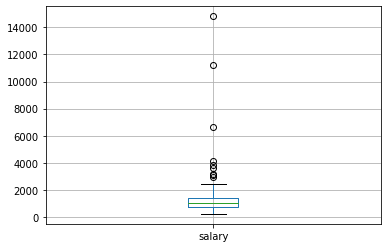

In [75]:
data.boxplot(column='salary',return_type='both')


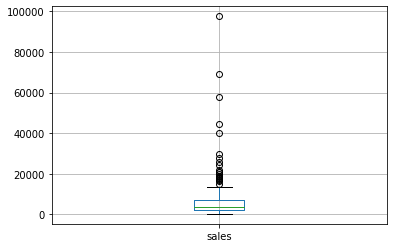

In [76]:
data.boxplot(column='sales')

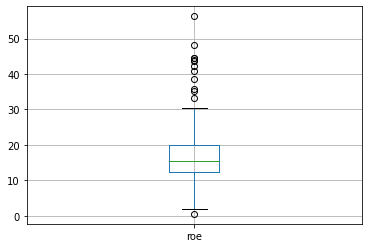

In [77]:
data.boxplot(column='roe')

In [78]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary

In [79]:
data_IQR = data[(data['salary']< Q3_salary +IQR_salary*1.5) & (data['salary']> Q1_salary - IQR_salary*1.5)]

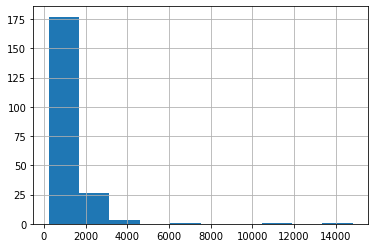

In [80]:
data['salary'].hist()

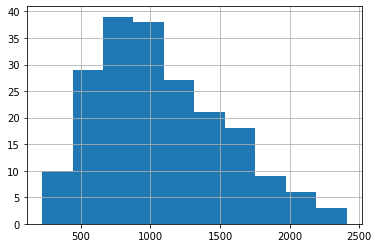

In [81]:
data_IQR['salary'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041a3ab690>,
      dtype=object)

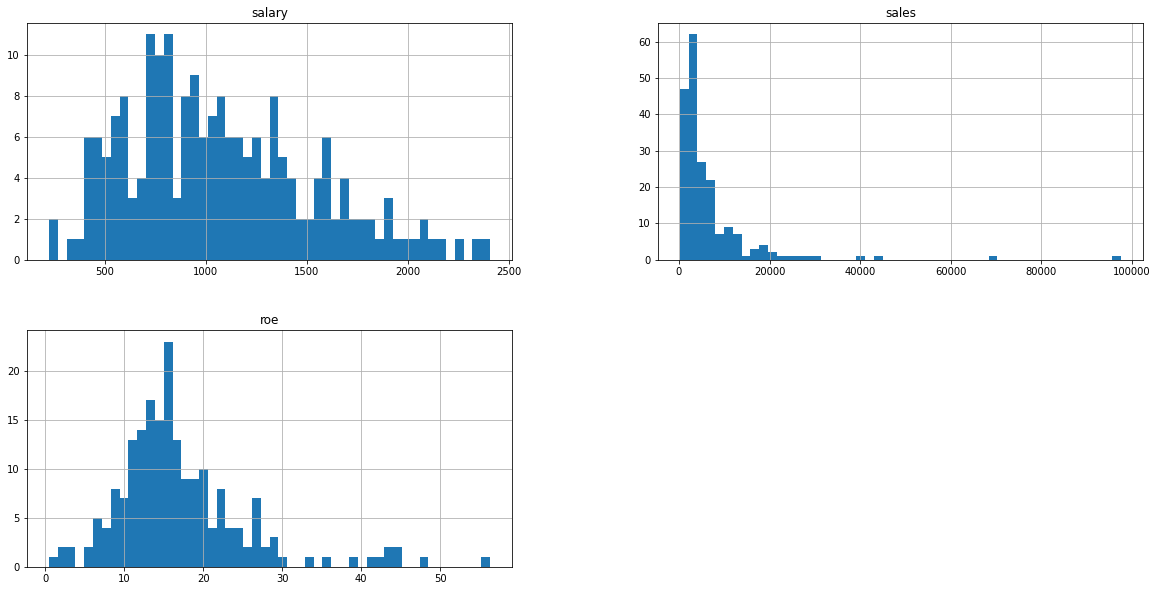

In [82]:
data_IQR.hist(bins=50, figsize=(20,10))

In [83]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_ssales = Q3_sales - Q1_sales

In [84]:
data_IQR = data[
                (data['salary']< Q3_salary +IQR_salary*1.5) & 
                (data['salary']> Q1_salary - IQR_salary*1.5) &
                (data['sales']< Q3_sales +IQR_ssales*1.5) & 
                (data['sales']> Q1_sales - IQR_ssales*1.5)
                ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041a0bfd50>,
      dtype=object)

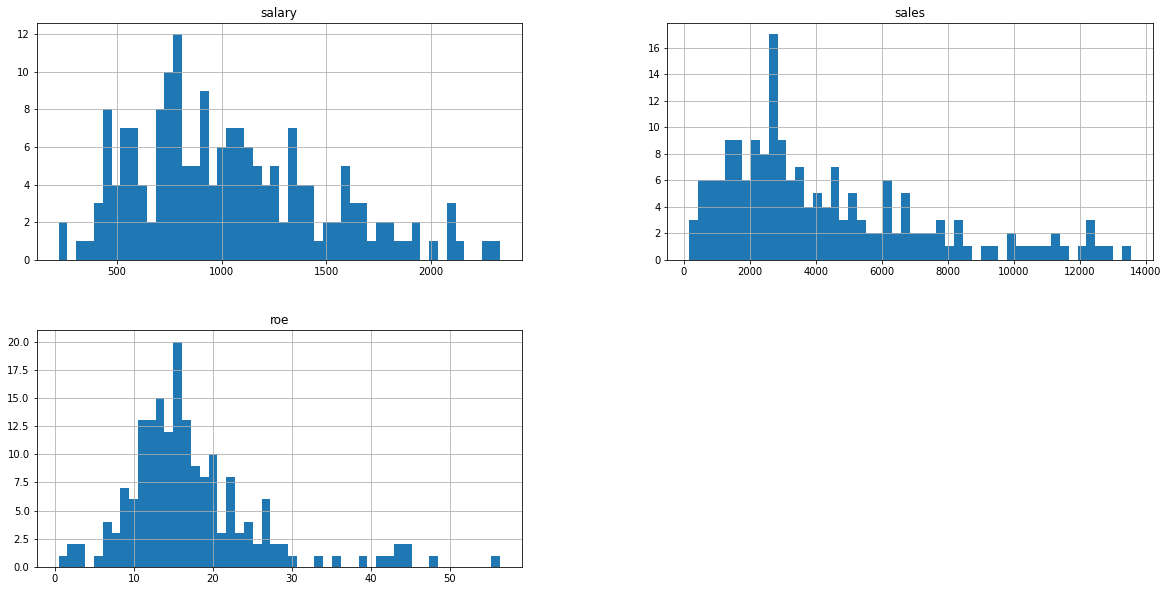

In [85]:
data_IQR.hist(bins=50, figsize=(20,10))

In [86]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


In [87]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


#변수변환

In [88]:
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])

In [89]:
data.head(2)

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.0,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.0,10.9,Service,6.908755,9.206132,2.388763


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0419d2c510>,
      dtype=object)

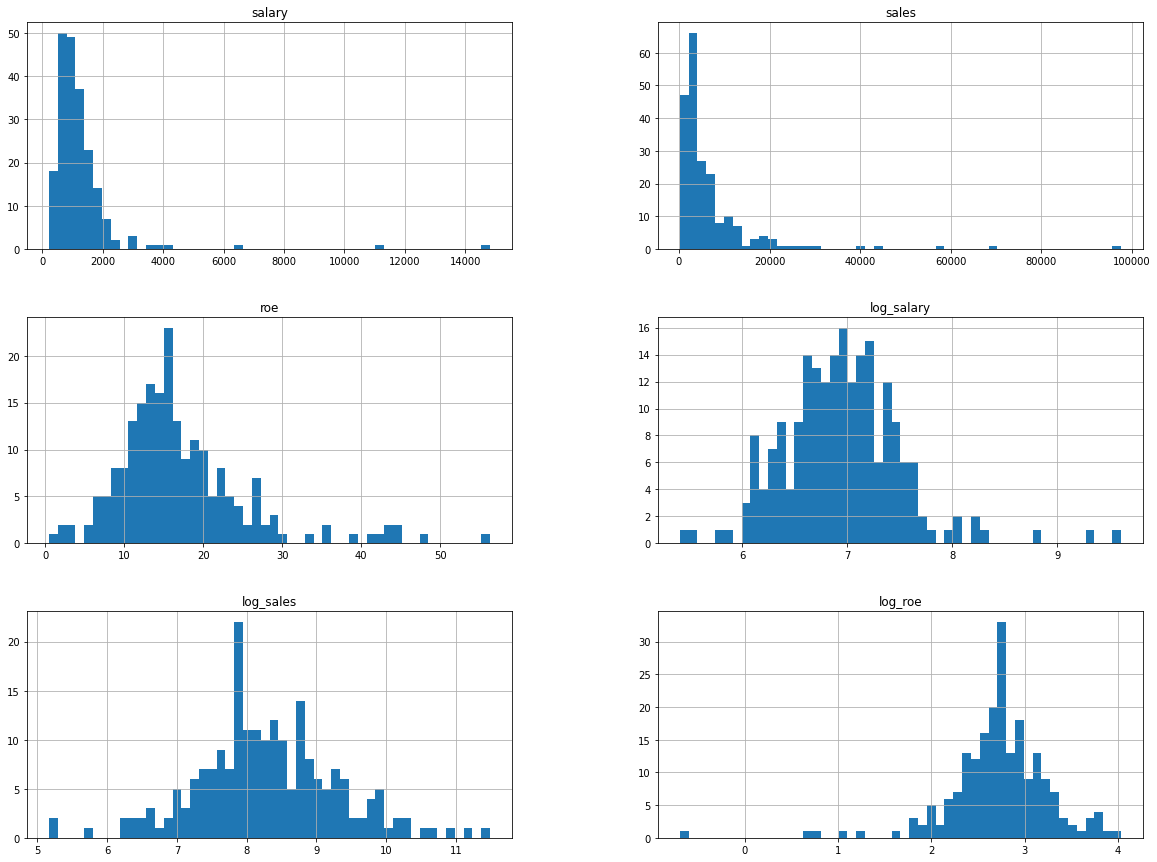

In [90]:
data.hist(bins=50,figsize=(20,15))

In [91]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


In [92]:
#fig, axes = plt.subplots(2,1, figsize=(10,10))
#axes[0] =

In [93]:
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])

In [94]:
data.head(2)

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.0,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.0,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041a0a7f10>,
      dtype=object)

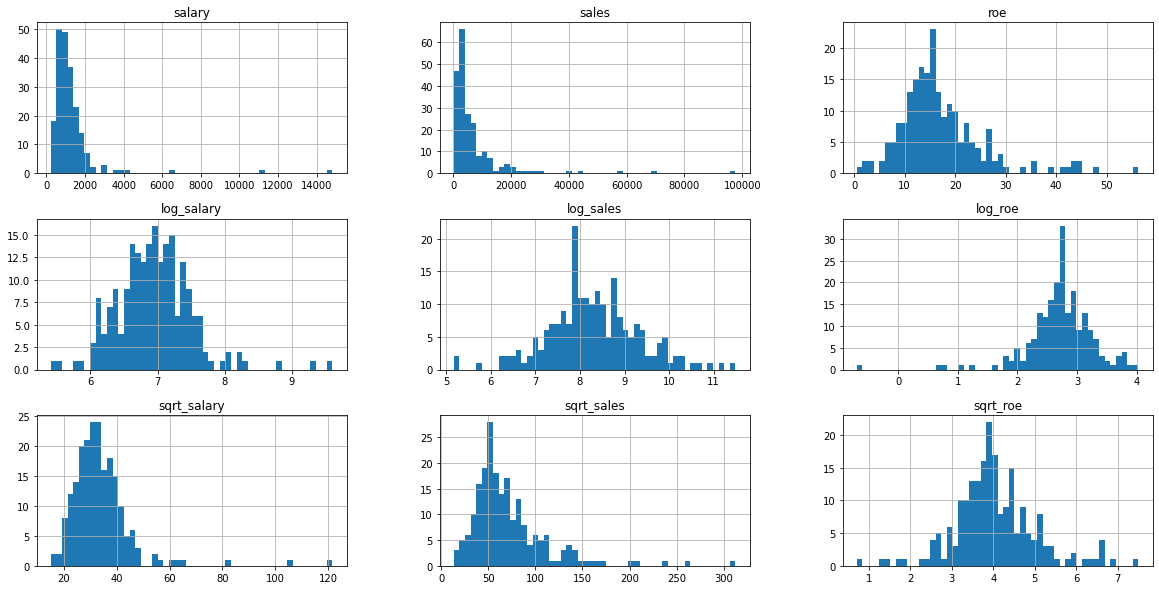

In [95]:
data.hist(bins=50, figsize=(20,10))

In [96]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


#결측치처리

In [98]:
data = pd.read_csv('Ex_Missing.csv')

In [99]:
data.head()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.1,1
1,NaN,9958.000000,10.9,1
2,NaN,6125.899902,23.5,1
3,578.0,16246.000000,5.9,1
4,1368.0,NaN,13.8,1


In [100]:
pd.isnull(data)

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [101]:
pd.notnull(data)

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [105]:
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [106]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [108]:
data.isnull().sum(0)

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [113]:
data['salary'].isnull().sum()

2

In [114]:
type(data['salary'])

pandas.core.series.Series

In [121]:
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [119]:
a = data.dropna(axis=0)

In [120]:
a

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [123]:
data = pd.read_csv('Ex_Missing.csv')

In [125]:
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [126]:
a = data.fillna(0)

In [127]:
a

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [128]:
b= data.fillna('missing')

In [129]:
b

,salary,sales,roe,industry
0,1095,27595,14.1,1
1,missing,9958,10.9,1
2,missing,6125.9,23.5,1
3,578,16246,5.9,1
4,1368,missing,13.8,1
5,1145,missing,20,2
6,1078,2266.7,16.4,2
7,1094,2966.8,16.3,2
8,1237,4570.2,10.5,2
9,833,2830,missing,2


In [130]:
c = data.fillna(method = 'ffill')

In [131]:
c

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [132]:
c = data.fillna(method = 'bfill')

In [133]:
c

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [134]:
d = data.fillna(data.mean())

In [135]:
d

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,9069.825012,13.800000,1
5,1145.0,9069.825012,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.600000,2


In [136]:
e = data.fillna(data.median())

In [137]:
e

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [138]:
f = data.fillna(data.max())

In [139]:
f

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1368.0,9958.000000,10.900000,1
2,1368.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,27595.000000,13.800000,1
5,1145.0,27595.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,23.500000,2


In [140]:
g = data.fillna(data['salary'].mean())

In [142]:
g

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1053.500000,13.800000,1
5,1145.0,1053.500000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,1053.500000,2


In [143]:
data2= data.copy()

In [144]:
data2

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [147]:
data2['new'] = np.where(data2['salary'].notnull(), data2['salary'], data2['sales'])

In [151]:
data2

,salary,sales,roe,industry,new
0,1095.0,27595.000000,14.100000,1,1095.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,578.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,1078.000000
7,1094.0,2966.800049,16.299999,2,1094.000000
8,1237.0,4570.200195,10.500000,2,1237.000000
9,833.0,2830.000000,NaN,2,833.000000


In [149]:
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224975,13.64
2,1077.400000,3158.425049,15.80


In [154]:
#교재 95 페이지에 람다 쓰는 부분 공부

#실전예제

In [155]:
data = pd.read_csv('house_raw.csv')

In [156]:
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041846fa90>,
      dtype=object)

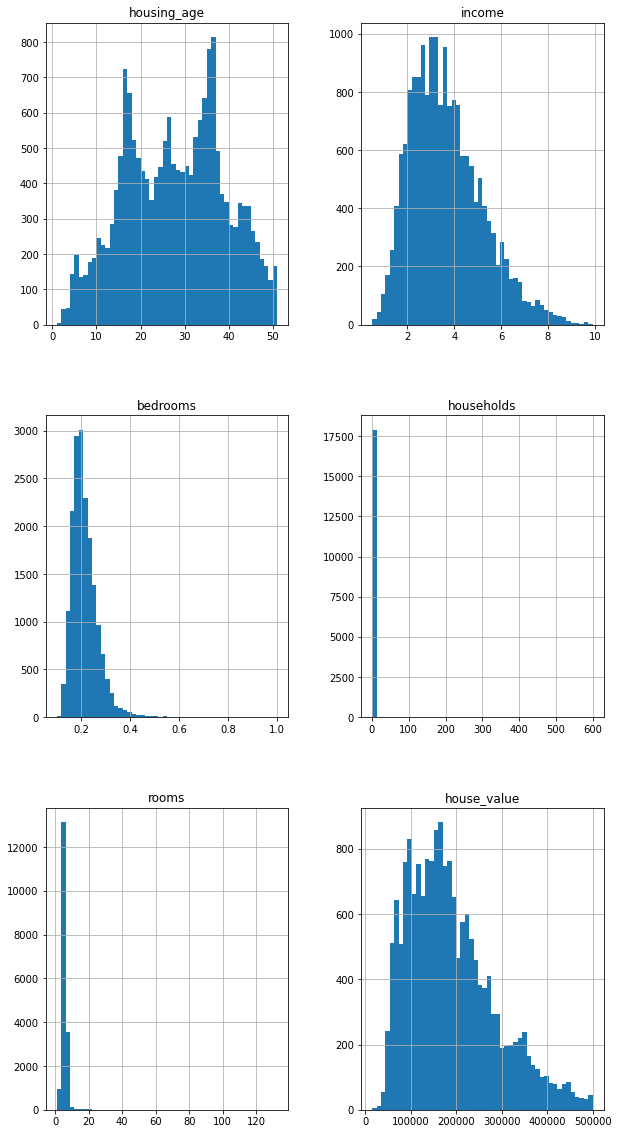

In [163]:
#data.hist(bins=50, figsize=(10.20))
data.hist(bins=50, figsize=(10,20))

In [164]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


In [169]:
IQR1_households = data['households'].quantile(0.25)
IQR3_households = data['households'].quantile(0.75)
IQR_households = IQR3_households - IQR1_households

In [170]:
IQR1_rooms = data['rooms'].quantile(0.25)
IQR3_rooms = data['rooms'].quantile(0.75)
IQR_rooms = IQR3_rooms - IQR1_rooms

In [192]:
data_1 = data[
        (data['households']  < (IQR3_households + 1.5* IQR_households)) &
        (data['households']  > (IQR1_households - 1.5* IQR_households)) &
        (data['rooms'] < (IQR3_rooms + 1.5* IQR_rooms)) &
        (data['rooms'] > (IQR1_rooms - 1.5* IQR_rooms))
]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0415210810>,
      dtype=object)

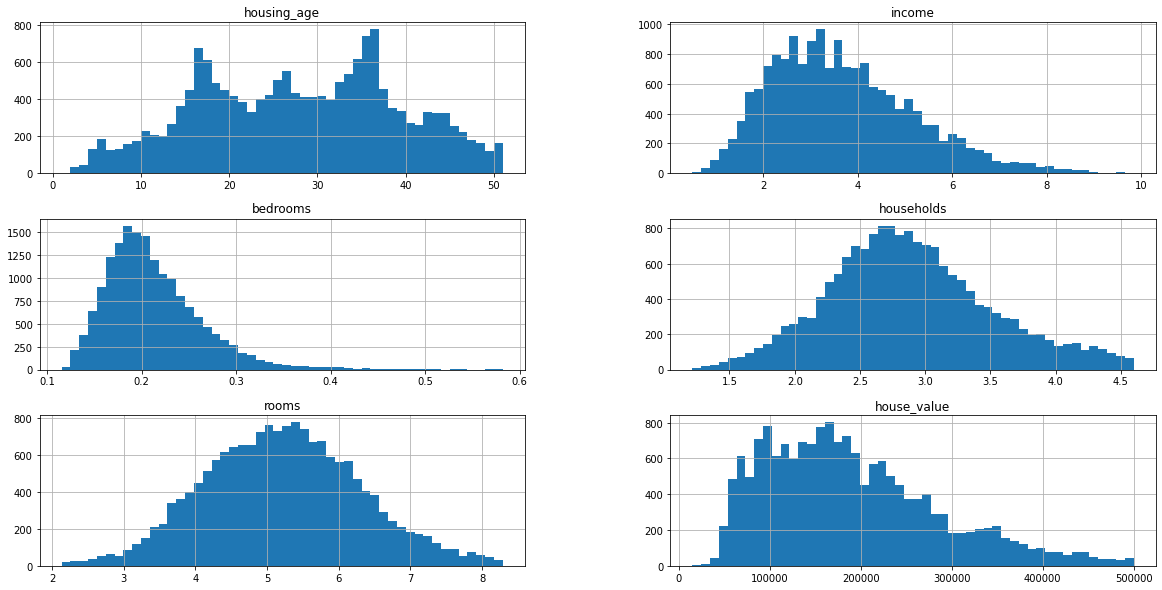

In [193]:
data_1.hist(bins=50, figsize=(20,10))

In [194]:
data_1['bedrooms'] = np.log(data_1['bedrooms'])
data_1['house_value'] = np.sqrt(data_1['house_value'])
data_1['income'] = np.log(data_1['income'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0414c49890>,
      dtype=object)

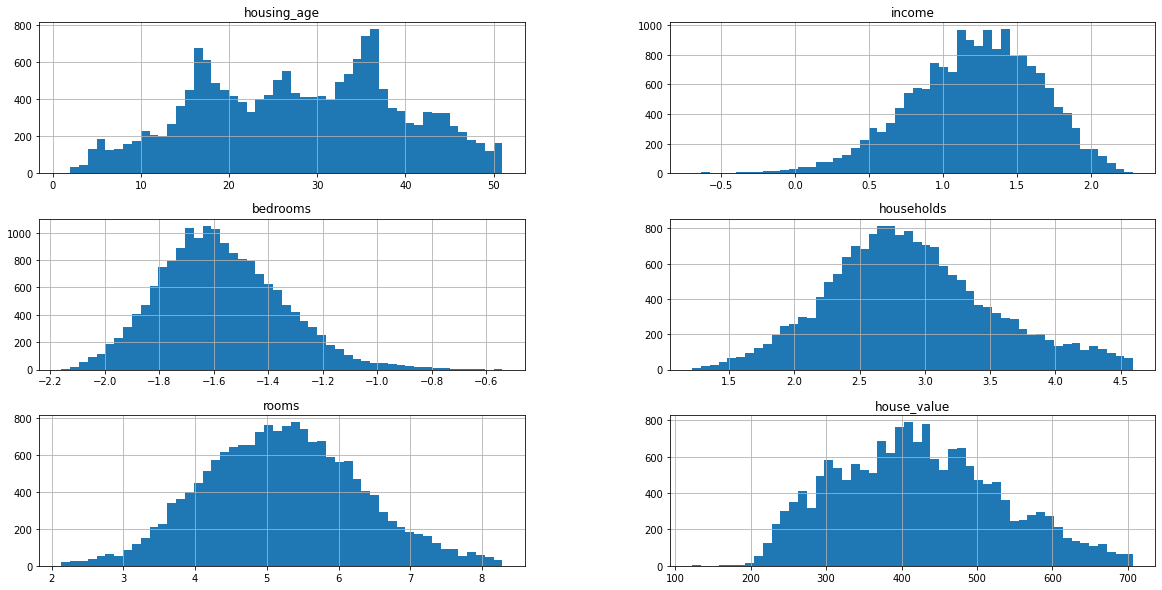

In [195]:
data_1.hist(bins=50, figsize=(20,10))

In [196]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()

In [197]:
mms.fit(data_1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [198]:
data_t = mms.transform(data_1)

In [200]:
names = data_1.columns

In [201]:
data_t_pd = pd.DataFrame( data = data_t, columns = names )

In [203]:
data_t_pd.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,16930.000000,16930.000000,16930.000000,16930.000000,16930.000000,16930.000000
mean,0.528397,0.640798,0.361586,0.494081,0.501407,0.513121
std,0.225758,0.144807,0.138831,0.185597,0.176289,0.185188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.546059,0.264515,0.367422,0.376685,0.369808
50%,0.540000,0.651480,0.349948,0.478901,0.498889,0.503395
75%,0.700000,0.746211,0.449038,0.606391,0.619355,0.636464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
names

Index(['housing_age', 'income', 'bedrooms', 'households', 'rooms',
       'house_value'],
      dtype='object')

In [206]:
X = data[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]
y = data['house_value']
X_t = data_t_pd[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]
y_t = data_t_pd['house_value']

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
lr = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))


0.6119989612064464


In [213]:
from sklearn.model_selection import train_test_split
lr = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_t,y_t)
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))


0.6248865816477083
